## **Building a Convolucional Neural Network (CNN) Model for Binary Classification**

**_Cat vs. Dog_ - [Dataset source](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip)**: This dataset contains images of cats and dogs hosted by Microsoft, and also is available on Kraggle with the name Dogs vs. Cats. 

The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying images as either containing a dog or cat. It can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification.

In this Jupyter notebook, the process of building a Convolutional Neural Network (CNN) model for binary classification has been presented. **The coverage includes the entire process, from model building to performance estimation, saving, and subsequent use for making predictions on new data.**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib # play around with paths and directories
import os
from tqdm import tqdm  # it's used for graphical progress bars in py

In [13]:
# Check the number of files in Dog directory
len(os.listdir('../datasets/PetImages/Dog'))

12500

In [14]:
# Check the number of files in Cat directory
len(os.listdir('../datasets/PetImages/Cat'))

12500

In [19]:
# Path to the Image directory
data_path = pathlib.Path("../datasets/PetImages/")
all_paths = data_path.glob("*/*.jpg") # it looks for all files with a .jpg extension 
all_paths

<generator object Path.glob at 0x00000226292EACE0>

In [20]:
# Transform the path object in a list
all_paths = list(all_paths)
all_paths[:10] # some samples

[WindowsPath('../datasets/PetImages/Cat/0.jpg'),
 WindowsPath('../datasets/PetImages/Cat/1.jpg'),
 WindowsPath('../datasets/PetImages/Cat/10.jpg'),
 WindowsPath('../datasets/PetImages/Cat/100.jpg'),
 WindowsPath('../datasets/PetImages/Cat/1000.jpg'),
 WindowsPath('../datasets/PetImages/Cat/10000.jpg'),
 WindowsPath('../datasets/PetImages/Cat/10001.jpg'),
 WindowsPath('../datasets/PetImages/Cat/10002.jpg'),
 WindowsPath('../datasets/PetImages/Cat/10003.jpg'),
 WindowsPath('../datasets/PetImages/Cat/10004.jpg')]

In [22]:
# all_paths can be used to iterate over the file paths 
len(all_paths)

25000

In [23]:
# Transform the path (returned by glob generator object) into string using map function
all_paths = list(map(lambda x : str(x).replace("\\", "/"), all_paths))
all_paths[:10]

['../datasets/PetImages/Cat/0.jpg',
 '../datasets/PetImages/Cat/1.jpg',
 '../datasets/PetImages/Cat/10.jpg',
 '../datasets/PetImages/Cat/100.jpg',
 '../datasets/PetImages/Cat/1000.jpg',
 '../datasets/PetImages/Cat/10000.jpg',
 '../datasets/PetImages/Cat/10001.jpg',
 '../datasets/PetImages/Cat/10002.jpg',
 '../datasets/PetImages/Cat/10003.jpg',
 '../datasets/PetImages/Cat/10004.jpg']

In [26]:
# Check more samples in a random way
from random import shuffle

shuffle(all_paths)
all_paths[:15]

['../datasets/PetImages/Dog/10829.jpg',
 '../datasets/PetImages/Dog/8203.jpg',
 '../datasets/PetImages/Cat/8717.jpg',
 '../datasets/PetImages/Dog/3766.jpg',
 '../datasets/PetImages/Cat/6109.jpg',
 '../datasets/PetImages/Cat/6712.jpg',
 '../datasets/PetImages/Cat/9727.jpg',
 '../datasets/PetImages/Cat/5578.jpg',
 '../datasets/PetImages/Dog/10896.jpg',
 '../datasets/PetImages/Dog/976.jpg',
 '../datasets/PetImages/Dog/2726.jpg',
 '../datasets/PetImages/Cat/10027.jpg',
 '../datasets/PetImages/Dog/3247.jpg',
 '../datasets/PetImages/Dog/2485.jpg',
 '../datasets/PetImages/Dog/9496.jpg']

In [28]:
# Check the image quality by looping on all the images and decoding them using the decode jpeg method
def test_image_quality(all_paths):
    # This function receives a list of file paths
    # that filters a list of file paths to retain only those that represent valid JPEG images

    new_all_paths = []
    for path in tqdm(all_paths):
        try:
            # load image file
            image = tf.io.read_file(path)
            # decode a JPEG-encoded image to a uint8 tensor
            image = tf.io.decode_jpeg(image, channels=3) 
            # channels indicates the desired number of color channel
            # 3: output an RGB image
        except:
            continue
        new_all_paths.append(path)

    return new_all_paths

In [29]:
all_paths = test_image_quality(all_paths)
all_paths[:10]

100%|██████████| 25000/25000 [03:22<00:00, 123.34it/s]


['../datasets/PetImages/Dog/10829.jpg',
 '../datasets/PetImages/Dog/8203.jpg',
 '../datasets/PetImages/Cat/8717.jpg',
 '../datasets/PetImages/Dog/3766.jpg',
 '../datasets/PetImages/Cat/6109.jpg',
 '../datasets/PetImages/Cat/6712.jpg',
 '../datasets/PetImages/Cat/9727.jpg',
 '../datasets/PetImages/Cat/5578.jpg',
 '../datasets/PetImages/Dog/10896.jpg',
 '../datasets/PetImages/Dog/976.jpg']

In [30]:
# Getting their respective labels 
# all_paths = the labels is the second word from the last part [-2] 
def get_label(image_path):
    return image_path.split("/")[-2]

all_labels = list(map(lambda x : get_label(x) , all_paths))
all_labels[:10]

['Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Cat', 'Cat', 'Cat', 'Dog', 'Dog']

In [31]:
# The model does not accept string as labels
# Transform Cat and Dog to 0 and 1
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [32]:
# Split the data
from sklearn.model_selection import train_test_split 

X_train_path, X_test_path, y_train_labels, y_test_labels = train_test_split(all_paths , all_labels)

In [34]:
X_train_path[:5], X_test_path[:5]

(['../datasets/PetImages/Cat/6828.jpg',
  '../datasets/PetImages/Dog/5979.jpg',
  '../datasets/PetImages/Dog/3542.jpg',
  '../datasets/PetImages/Cat/4605.jpg',
  '../datasets/PetImages/Cat/2080.jpg'],
 ['../datasets/PetImages/Cat/6818.jpg',
  '../datasets/PetImages/Dog/7054.jpg',
  '../datasets/PetImages/Dog/5964.jpg',
  '../datasets/PetImages/Cat/9163.jpg',
  '../datasets/PetImages/Dog/6636.jpg'])

In [114]:
len(X_train_path), len(y_train_labels)

(18618, 18618)

In [113]:
len(X_test_path), len(y_test_labels) 

(6206, 6206)

In [35]:
# Function used to decode jpeg into Tensor

def load(image, label):
    # It takes an image path and its labels as arguments
    # It returns the image tensor and the label

    image = tf.io.read_file(image) # read image path as an encode string
    image = tf.io.decode_jpeg(image , channels = 3)
    
    return image, label 

In [36]:
# Image transformations
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 128

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))])

In [37]:
# Function used to Create a Tensorflow Data Object from image path and labels
# It loads and preprocesses the images, performs data augmentation, shuffles the data, and batches it for training
# It returns the dataset object

AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train=True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset, label_dataset)) 
    # zip it to iterate on both of them at once

    dataset = dataset.map(lambda image, label: load(image, label)) 
    # it applies load function to all image paths in the dataset
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=AUTOTUNE)
    # it applies resize function to all image vector loaded in the previous step
    # num_parallel_calls: tf has an module called autotune, 
    # which automatically assigns parallel cells based on the system resources available
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    # it this function is called in training mode, it applies data augmentation
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()

    return dataset


In [39]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(X_train_path, y_train_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape) 
# 128 is the batch size and 224,224, 3 is the size of each image in the batch

CPU times: total: 719 ms
Wall time: 843 ms
(128, 224, 224, 3)
(128,)


Dog


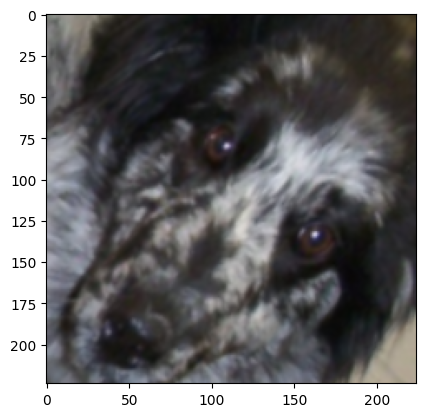

In [40]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))
# image[0]: accesses the first image in the dataset
# .numpy(): converts the tf tensor to a np array
# /255: scales the pixel values from the range [0, 255] to the range [0, 1]
# .reshape(224, 224, 3): reshapes the image data to have dimensions 224x224x3
# it's expected to be a 3-channel (RGB) image with a size of 224x224 pixels

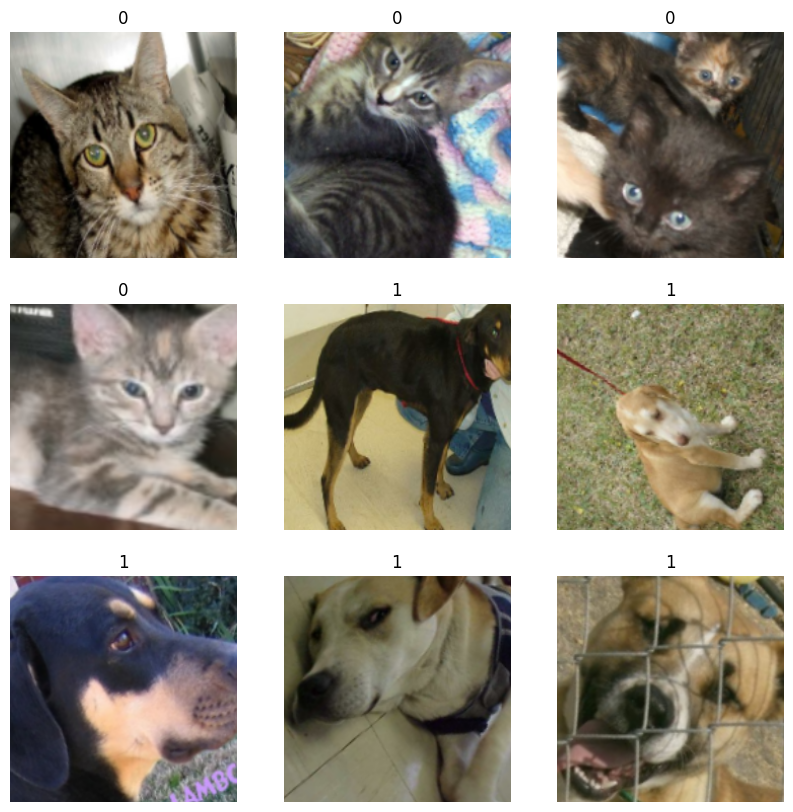

In [110]:
# more images from train_dataset
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [42]:
# Creating Test Dataset object and Verifying it
# train=False means without augmentation
%time test_dataset = get_dataset(X_test_path, y_test_labels, train=False)

image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

CPU times: total: 31.2 ms
Wall time: 31 ms
(128, 224, 224, 3)
(128,)


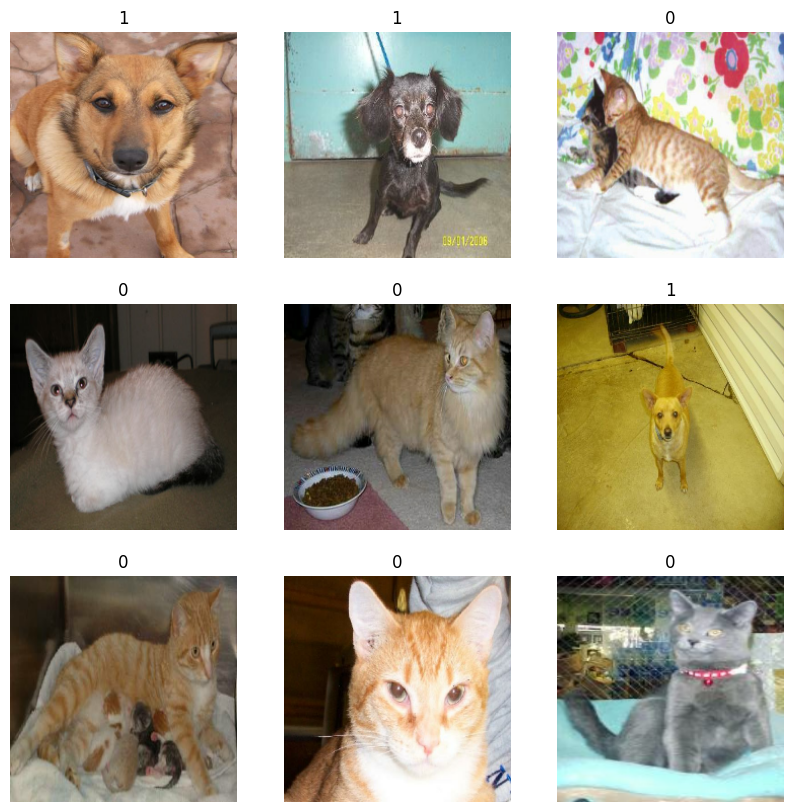

In [109]:
# images from test_dataset
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [45]:
# Build the Model - 5 layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization , GlobalMaxPool2D

model = Sequential()

# Block 1 
# it need to pass input shape to the first layer
model.add(Conv2D(input_shape=(224, 224, 3), padding='same', filters=32, kernel_size=(7, 7)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(filters=64, padding='valid', kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3 
model.add(Conv2D(filters=128, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Block 4 
# It increases the number of filters and decreases the kernel size while going deep 
model.add(Conv2D(filters=256, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# convert feature matrix into a single dimensional vector 
# that can be connected to dense layers
model.add(GlobalMaxPool2D())

model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Add one neuron with sigmoid activation (it's used for binary classification)
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

In [46]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      4736      
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 64)     

In [47]:
# Training parameters to evaluate the model
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [48]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(X_train_path)//BATCH_SIZE,
    epochs=10,
    validation_data=test_dataset,
    validation_steps= len(X_test_path)//BATCH_SIZE)

Epoch 1/10
145/145 [==============================] - 3936s 27s/step - loss: 0.8388 - accuracy: 0.5963 - val_loss: 0.7371 - val_accuracy: 0.5332
Epoch 2/10
145/145 [==============================] - 3706s 26s/step - loss: 0.5892 - accuracy: 0.6841 - val_loss: 0.7233 - val_accuracy: 0.5412
Epoch 3/10
145/145 [==============================] - 3679s 25s/step - loss: 0.5573 - accuracy: 0.7149 - val_loss: 0.6901 - val_accuracy: 0.6004
Epoch 4/10
145/145 [==============================] - 3771s 26s/step - loss: 0.5397 - accuracy: 0.7279 - val_loss: 0.5882 - val_accuracy: 0.6706
Epoch 5/10
145/145 [==============================] - 3885s 27s/step - loss: 0.5028 - accuracy: 0.7534 - val_loss: 0.5160 - val_accuracy: 0.7391
Epoch 6/10
145/145 [==============================] - 3582s 25s/step - loss: 0.4760 - accuracy: 0.7684 - val_loss: 0.6146 - val_accuracy: 0.6493
Epoch 7/10
145/145 [==============================] - 3588s 25s/step - loss: 0.4453 - accuracy: 0.7879 - val_loss: 0.5469 - val_ac

In [65]:
## Saving the model
## get the current directory where this .ipynb is located
#current_directory = os.getcwd()
#
## define the model file name
#model_filename = "dog_vs_cat.keras"
#
## combine the current directory and the model filename to create the full path
#model_path = os.path.join(current_directory, model_filename)
#
## save the model to the specified path
#model.save(model_path)

Storing and saving ML models:
1. **.h5 Format:** (store the entire model, including architecture, weights, and configuration, in a binary format)
    - The .h5 format is a common file format for saving Keras and TensorFlow models.
    - It stores the model architecture, model weights, optimizer configuration, and training configuration in a single file.
    - .h5 files are binary files and can be used to save and load models across different platforms and environments.
    - You can use .save() and .load_model() methods in Keras to save and load models in the .h5 format.
2. **.keras Format:** (store only the model architecture in a human-readable JSON format, making them useful for sharing model structures)
    - The .keras format is a more recent development in Keras and TensorFlow.
    - .keras files are used for saving the model's architecture only, excluding the model weights, optimizer configuration, and training configuration.
    - These files are stored in a JSON format and are more human-readable compared to .h5 files.
    - .keras files are typically used to save and share model architectures, and they can be particularly useful for model version control or sharing model structures.

In [54]:
# Evaluating the model
loss, acc = model.evaluate(test_dataset)

print("Testing Acc:", acc)
print("Testing Loss:", loss)

49/49 [==============================] - 244s 5s/step - loss: 0.5094 - accuracy: 0.7370
Testing Acc: 0.7370286583900452
Testing Loss: 0.5093708634376526


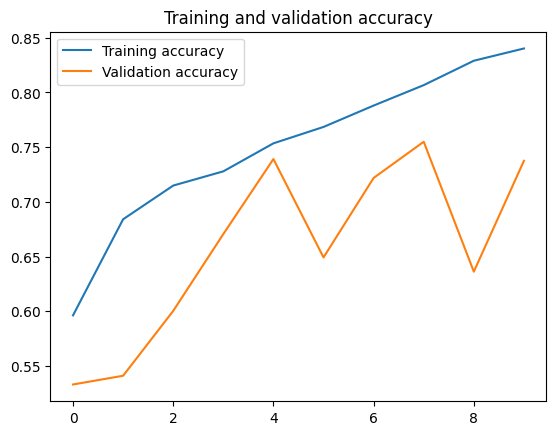

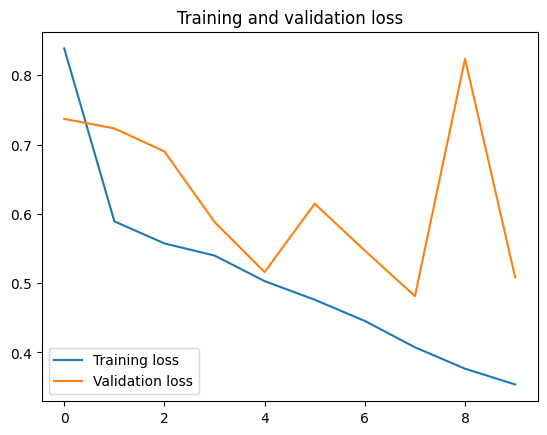

In [60]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### **Testing the CNN model:**

In [133]:
import shutil

#shutil.make_archive("TEST_dog_vs_cat", 'zip', "TEST_dog_vs_cat")

In [81]:
import urllib.request # library module for working with URLs and making HTTP requests
import matplotlib.image as mpimg
from tensorflow import keras

In [94]:
def test_url_image(url):
    urllib.request.urlretrieve(url,'pet.jpg') # dowload the image from url and save it to the local file system

    # load the model and testing the image
    image_size = (224, 224)
    image = mpimg.imread('pet.jpg')
    
    load_model = keras.models.load_model('TEST_dog_vs_cat')
    img = keras.preprocessing.image.load_img(
        "pet.jpg", target_size=image_size
    )
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    @tf.function
    def predict_with_model(model, input_array):
        return model(input_array)

    predictions = predict_with_model(load_model, img_array)
    score = float(predictions[0][0])

    title = "This image is {:.2f} percent cat and {:.2f} percent dog.".format(100 * (1 - score), 100 * score)
    
    # Display the image with a title
    plt.imshow(image)
    plt.title(title)  # Add a title to the image

    return plt.show()

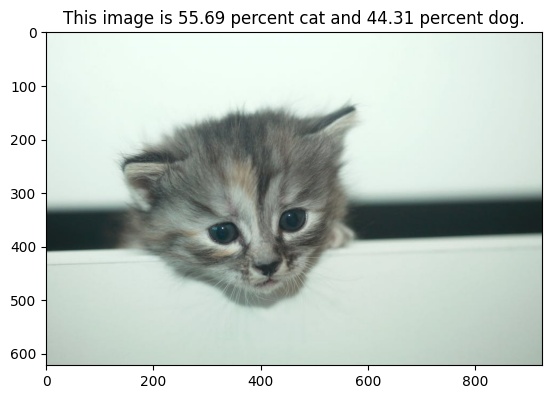

In [121]:
url = input('Enter URL: ')
test_one = test_url_image(url)

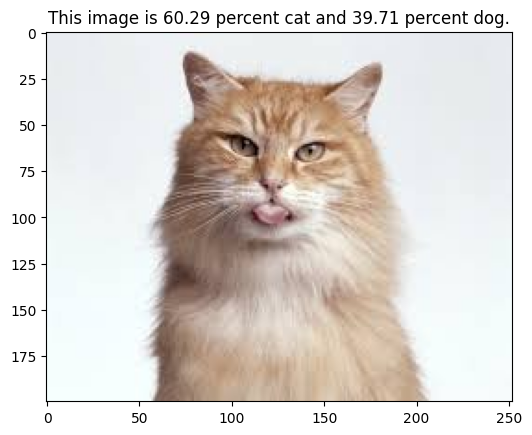

In [96]:
url = input('Enter URL: ')
test_two = test_url_image(url) 

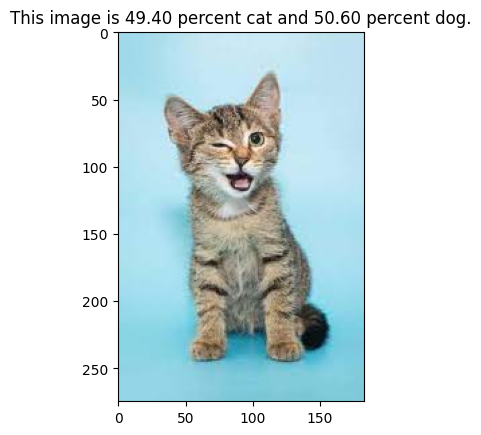

In [127]:
url = input('Enter URL: ')
test_three = test_url_image(url) 

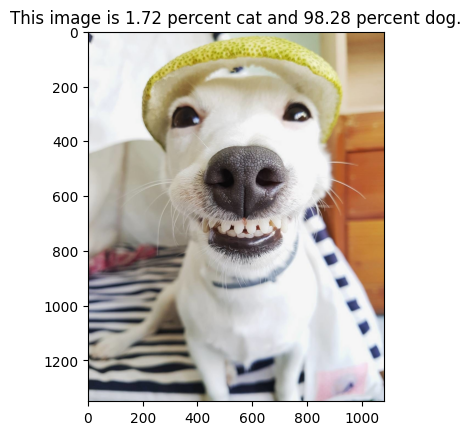

In [123]:
url = input('Enter URL: ')
test_four = test_url_image(url)

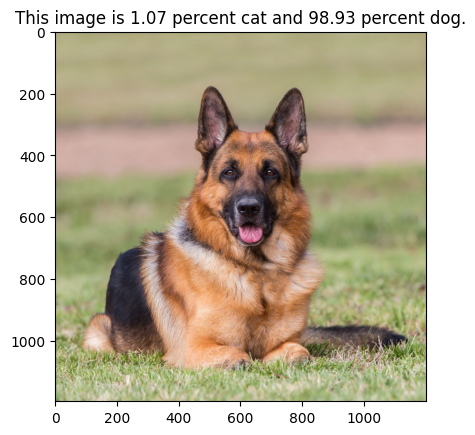

In [104]:
url = input('Enter URL: ')
test_five = test_url_image(url)

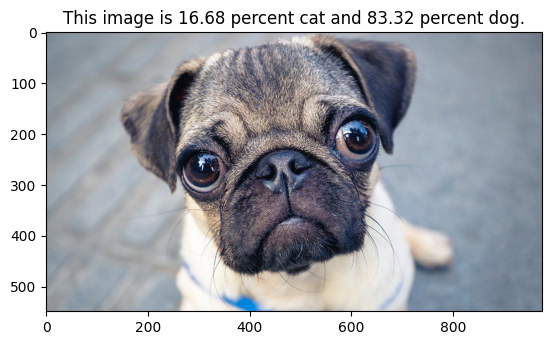

In [105]:
url = input('Enter URL: ')
test_six = test_url_image(url)

> It does not appear to be satisfactory for cat classification.